
## Observations and Insights 
1) Capomulin and Ramicane had the most mice treated.

2) Capomulin and Ramicane are also the treatments that showed the smallest average tumor volume.

3) There was a near equal distribution of Female to Male mice. 49.3(F) , 50.7(M

In [147]:
# DEPENDENCIES AND SETUP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# STUDY DATA FILES
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# READ THE MOUSE DATA AND THE STUDY RESULTS
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#### COMBINE THE DATA INTO A SINGLE DATASET

In [148]:
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


#### CHECK THE NUMBER OF MICE IN THE DATAFRAME

In [149]:
mice_unique = merged_df["Mouse ID"].unique()
mice_unique_count = len(mice_unique)
print(f" Mice in DF: {mice_unique_count}")

 Mice in DF: 249


#### GET THE DUPLICATE MICE BY ID NUMBER THAT SHOWS UP FOR MOUSE ID AND TIMEPOINT.

In [150]:
duplicate_mouse_data = merged_df[merged_df.duplicated(["Mouse ID" , "Timepoint"])]

In [151]:
# OPTIONAL: GET ALL THE DATA FOR THE DUPLICATE MOUSE ID.
duplicate_mouse_data.style.set_caption("DUPLICATE MICE DATA")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45,0
911,g989,Propriva,Female,21,26,5,47.5704,0
913,g989,Propriva,Female,21,26,10,49.8805,0
915,g989,Propriva,Female,21,26,15,53.442,0
917,g989,Propriva,Female,21,26,20,54.6577,1


#### CREATE A CLEAN DATAFRAME BY DROPPING THE DUPLICATE MOUSE BY ITS ID.

In [152]:
# NOTE: HAD TO ADD "TIMEPOINT" TO THE SUBSET TO AVOID LOOSING MOUSE DATA OTHERWISE I ONLY GET 249 ROWS.
clean_df = merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [153]:
# CHECK THE NUMBER OF MICE IN THE CLEAN DATAFRAME.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [154]:
clean_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


#### GENERATE A SUMMARY STATISTICS TABLE OF MEAN, MEDIAN, VARIANCE, STANDARD DEVIATION, AND SEM OF THE TUMOR VOLUME FOR EACH REGIMEN

In [155]:
# CALCULATE STATS
tumor_volume_mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() , 2)
tumor_volume_median = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() , 2)
tumor_volume_variance = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var() , 2)
tumor_volume_sd = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() , 2)
tumor_volume_sem = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() , 2)

In [156]:
# CREATE LIST OF REGIMENS
drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [157]:
# COMBINE DATA ABOVE INTO DF
regimen_stats_df = pd.DataFrame({"Tumor Vol Mean" : tumor_volume_mean,
                                 "Tumor Vol Median" : tumor_volume_median,
                                 "Tumor Vol Variance" : tumor_volume_variance,
                                 "Tumor Vol SD" : tumor_volume_sd,
                                 "Tumor Vol SEM" : tumor_volume_sem,})

regimen_stats_df.style.set_caption("DRUG REGIMEN STATS SUMMARY")

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol SD,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.7,68.55,8.28,0.6
Naftisol,54.33,52.51,66.17,8.13,0.6
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [158]:
# DISPLAYING HEADERS
clean_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


#### GENERATE A BAR PLOT SHOWING THE NUMBER OF MICE FOR EACH TREATMENT THROUGHOUT THE COURSE OF THE STUDY USING PANDAS.

Text(0, 0.5, 'Number of Mice')

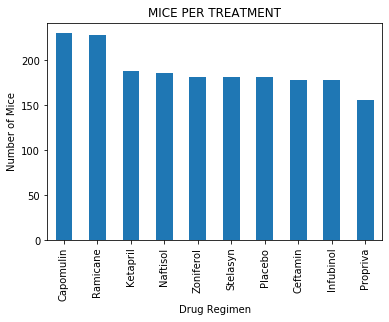

In [159]:
treatments_df = clean_df["Drug Regimen"].value_counts()
treatments_pd_plot = treatments_df.plot(kind="bar")

# LABLING
treatments_pd_plot.set_title("MICE PER TREATMENT")
treatments_pd_plot.set_xlabel("Drug Regimen")
treatments_pd_plot.set_ylabel("Number of Mice")

#### GENERATE A BAR PLOT SHOWING THE NUMBER OF MICE FOR EACH TREATMENT THROUGHOUT THE COURSE OF THE STUDY USING PYPLOT.

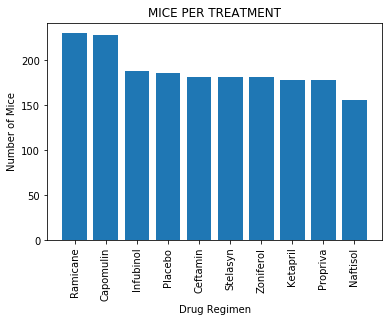

In [160]:
# GET TREATMENT LIST
treatment_list = drug_regimens.tolist()

# GET MICE PER TREATMENT LIST
mice_per_treatment_list = treatments_df.to_list()

#PLOT
plt.bar(treatment_list, mice_per_treatment_list)

# LABLING
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90) 
plt.ylabel("Number of Mice")
plt.title("MICE PER TREATMENT")
plt.show()

#### GENERATE A BAR PLOT SHOWING THE NUMBER OF MICE PER TIME POINT FOR EACH TREATMENT THROUGHOUT THE COURSE OF THE STUDY USING PANDAS.

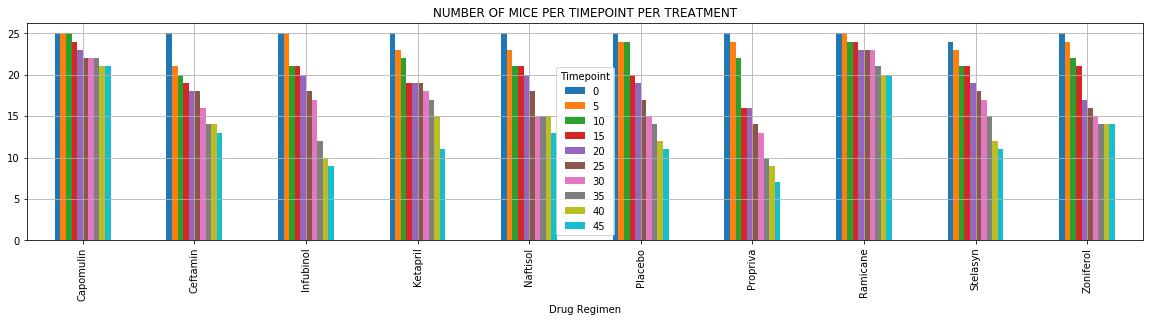

In [166]:
# SET UP DF
drug_timepoint_df = pd.pivot_table(clean_df , "Mouse ID", index = ["Drug Regimen"], columns=["Timepoint"], aggfunc="count")

#PLOT
drug_timepoint_df.plot(kind="bar", figsize=(20,4) , grid=True , title="NUMBER OF MICE PER TIMEPOINT PER TREATMENT", legend=True)

## Pie Plots

In [167]:
# HEADERS
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

#### GENERATE A PIE PLOT SHOWING THE DISTRIBUTION OF FEMALE VERSUS MALE MICE USING PANDAS

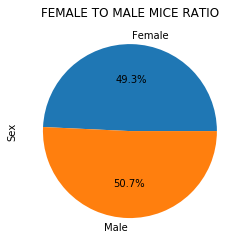

In [168]:
mice_by_sex = clean_df.groupby("Sex")["Sex"].count()
mice_by_sex.plot(kind = "pie" , title = "FEMALE TO MALE MICE RATIO" , autopct="%1.1f%%")

#### GENERATE A PIE PLOT SHOWING THE DISTRIBUTION OF FEMALE VERSUS MALE MICE USING PYPLOT

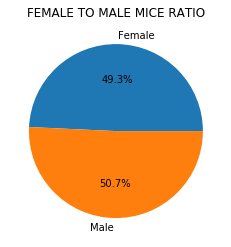

In [169]:
sex_list = ["Female", "Male"]
plt.pie(mice_by_sex, labels=sex_list , autopct="%1.1f%%")
plt.title("FEMALE TO MALE MICE RATIO")
plt.show()

## Quartiles, Outliers and Boxplots
#### CALCULATE THE FINAL TUMOR VOLUME OF EACH MOUSE ACROSS THE 4 MOST PROMISING TREATMENT REGIMENS:
- Capomulin, Ramicane, Infubinol, and Ceftamin

In [170]:
# DISPLAYING HEADERS
clean_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [171]:
# MAKE LIST OF TOP 4 DRUGS (GOT LIST FROM READ ME)
top_4_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# CALULATE FINAL TUMOR VOLUME PER MOUSE PER TOP TREATMENTS
top_4_drugs_df = clean_df.loc[clean_df["Drug Regimen"].isin(top_4_drugs),
                              ["Mouse ID","Timepoint", "Drug Regimen","Tumor Volume (mm3)"]]

final_tumor_df = top_4_drugs_df.loc[top_4_drugs_df["Timepoint"] == 45].set_index("Mouse ID")
final_tumor_df.head(10)

#XXX- WHY WONT HEAD() WORK WHEN I USE THE CAPTION?
final_tumor_df.style.set_caption("FINAL TUMOR VOLUME PER MOUSE PER TOP 4 REGIMENS")

,Timepoint,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,,
k403,45,Ramicane,22.0501
s185,45,Capomulin,23.3436
x401,45,Capomulin,28.484
m601,45,Capomulin,28.431
g791,45,Ramicane,29.1285
s508,45,Ramicane,30.2762
m546,45,Ramicane,30.5646
z578,45,Ramicane,30.6387
j913,45,Ramicane,31.5605


In [172]:
# DISPLAYING HEADERS
clean_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [173]:
# MAKE DFs OF TOP 4 REGIMENS AT FINAL TIMEPOINT
capomulin_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Capomulin']
ramicane_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ramicane']
infubinol_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ceftamin']

In [174]:
# CAPOMULIN STATS
capomulin_final_tumors = capomulin_df["Tumor Volume (mm3)"]
capomulin_quartiles = round(capomulin_final_tumors.quantile([.25, .50, .75]) , 2)
capomulin_q1 = capomulin_quartiles[.25]
capomulin_q2 = capomulin_quartiles[.50]
capomulin_q3 = capomulin_quartiles[.75]
capomulin_iqr = round(st.iqr(capomulin_final_tumors) , 2)
capomulin_low_out = capomulin_q1 - 1.5*capomulin_iqr
capomulin_high_out = capomulin_q3 + 1.5*capomulin_iqr

    # SET AS INTERGER
(capomulin_df["Tumor Volume (mm3)"]).astype(int)
    # GET OUTLIERS
capomulin_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"]> capomulin_high_out) | 
                            (capomulin_df["Tumor Volume (mm3)"] < capomulin_low_out)]
    # COUNT OURLIERS
capomulin_out_count = capomulin_outliers["Timepoint"].count()

# SUMMARY
capomulin_summary = (
    f"CAPOMULIN STATS\n"
    f"Quartile 1: {capomulin_q1}\n"
    f"Quartile 2: {capomulin_q2}\n"
    f"Quartile 3: {capomulin_q3}\n"
    f"Interquartile Range: {capomulin_iqr}\n"
    f"Outliers have a tumor volume below {capomulin_low_out} and above {capomulin_high_out}\n"
    f"Capomulin outliers: {capomulin_out_count}\n"
    f"{'-' *20}\n")

In [175]:
# RAMICANE STATS
ramicane_final_tumors = ramicane_df["Tumor Volume (mm3)"]
ramicane_quartiles = round(ramicane_final_tumors.quantile([.25, .50, .75]) , 2)
ramicane_q1 = ramicane_quartiles[.25]
ramicane_q2 = ramicane_quartiles[.50]
ramicane_q3 = ramicane_quartiles[.75]
ramicane_iqr = round(st.iqr(ramicane_final_tumors) , 2)
ramicane_low_out = round(ramicane_q1 - 1.5*ramicane_iqr , 2)
ramicane_high_out = round(ramicane_q3 + 1.5*ramicane_iqr , 2)

    # SET AS INTERGER
(ramicane_df["Tumor Volume (mm3)"]).astype(int)
    # GET OUTLIERS
ramicane_outliers = ramicane_df.loc[(capomulin_df["Tumor Volume (mm3)"]> ramicane_high_out) | 
                            (ramicane_df["Tumor Volume (mm3)"] < ramicane_low_out)]
    # COUNT OURLIERS
ramicane_out_count = ramicane_outliers["Timepoint"].count()

# SUMMARY
ramicane_summary = (
    f"RAMICANE STATS\n"
    f"Quartile 1: {ramicane_q1}\n"
    f"Quartile 2: {ramicane_q2}\n"
    f"Quartile 3: {ramicane_q3}\n"
    f"Interquartile Range: {ramicane_iqr}\n"
    f"Outliers have a tumor volume below {ramicane_low_out} and above {ramicane_high_out}\n"
    f"Ramicane outliers: {ramicane_out_count}\n"
    f"{'-' *20}\n")

In [176]:
# INFUBINOL STATS
infubinol_final_tumors = infubinol_df["Tumor Volume (mm3)"]
infubinol_quartiles = round(infubinol_final_tumors.quantile([.25, .50, .75]) , 2)
infubinol_q1 = infubinol_quartiles[.25]
infubinol_q2 = infubinol_quartiles[.25]
infubinol_q3 = infubinol_quartiles[.75]
infubinol_iqr = round(st.iqr(infubinol_final_tumors) , 2)
infubinol_low_out = round(infubinol_q1 - 1.5*infubinol_iqr , 2)
infubinol_hight_out = round(infubinol_q3 + 1.5*infubinol_iqr , 2)

# SET AS INTERGER
(infubinol_df["Tumor Volume (mm3)"]).astype(int)
    #GET OUTLIERS
infubinol_outliers = infubinol_df.loc[(capomulin_df["Tumor Volume (mm3)"]> infubinol_hight_out) | 
                            (infubinol_df["Tumor Volume (mm3)"] < infubinol_low_out)]
    # COUNT OURLIERS
infubinol_out_count = infubinol_outliers["Timepoint"].count()

# SUMMARY
infubinol_summary = (
    f"INFUBINOL STATS\n"
    f"Quartile 1: {infubinol_q1}\n"
    f"Quartile 2: {infubinol_q2}\n"
    f"Quartile 3: {infubinol_q3}\n"
    f"Interquartile Range: {infubinol_iqr}\n"
    f"Outliers have a tumor volume below {infubinol_low_out} and above {infubinol_hight_out}\n"
    f"Infubinol outliers: {infubinol_out_count}\n"
    f"{'-' *20}\n")

In [177]:
# CEFTAMIN STATS
ceftamin_final_tumors = ceftamin_df["Tumor Volume (mm3)"]
ceftamin_quartiles = round(ceftamin_final_tumors.quantile([.25, .50, .75]) , 2)
ceftamin_q1 = ceftamin_quartiles[.25]
ceftamin_q2 = ceftamin_quartiles[.50]
ceftamin_q3 = ceftamin_quartiles[.75]
ceftamin_iqr = round(st.iqr(ceftamin_final_tumors) , 2)
ceftamin_low_out = round(ceftamin_q1 - 1.5*ceftamin_iqr , 2)
ceftamin_high_out = round(ceftamin_q3 + 1.5*ceftamin_iqr , 2)

# SET AS INTERGER
(ceftamin_df["Tumor Volume (mm3)"]).astype(int)
    # GET OUTLIERS
ceftamin_outliers = ceftamin_df.loc[(capomulin_df["Tumor Volume (mm3)"]> ceftamin_high_out) | 
                            (ceftamin_df["Tumor Volume (mm3)"] < ceftamin_low_out)]
    # COUNT OURLIERS
ceftamin_out_count = ceftamin_outliers["Timepoint"].count()

# SUMMARY
ceftamin_summary = (
    f"CEFTAMIN STATS\n"
    f"Quartile 1: {ceftamin_q1}\n"
    f"Quartile 2: {ceftamin_q2}\n"
    f"Quartile 3: {ceftamin_q2}\n"
    f"Interquartile Range: {ceftamin_iqr}\n"
    f"Outliers have a tumor volume below {ceftamin_low_out} and above {ceftamin_high_out}\n"
    f"Ceftamin outliers: {ceftamin_out_count}\n"
    f"{'-' *20}\n")

#### Calculate the IQR (Interquartile Range) and quantitatively determine if there are any potential outliers. 

In [178]:
# PRINT SUMMARIES
print(capomulin_summary)
print(ramicane_summary)
print(infubinol_summary)
print(ceftamin_summary)

CAPOMULIN STATS
Quartile 1: 32.38
Quartile 2: 37.31
Quartile 3: 40.16
Interquartile Range: 7.78
Outliers have a tumor volume below 20.71 and above 51.83
Capomulin outliers: 0
--------------------

RAMICANE STATS
Quartile 1: 30.98
Quartile 2: 34.85
Quartile 3: 38.51
Interquartile Range: 7.53
Outliers have a tumor volume below 19.69 and above 49.8
Ramicane outliers: 0
--------------------

INFUBINOL STATS
Quartile 1: 62.75
Quartile 2: 62.75
Quartile 3: 67.69
Interquartile Range: 4.93
Outliers have a tumor volume below 55.36 and above 75.08
Infubinol outliers: 0
--------------------

CEFTAMIN STATS
Quartile 1: 61.43
Quartile 2: 64.3
Quartile 3: 64.3
Interquartile Range: 6.09
Outliers have a tumor volume below 52.3 and above 76.67
Ceftamin outliers: 0
--------------------



#### GENERATE A BOX PLOT OF THE FINAL TUMOR VOLUME OF EACH MOUSE ACROSS FOUR REGIMENS OF INTEREST

Text(0, 0.5, 'Tumor Volume')

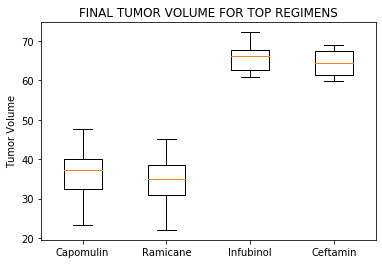

In [179]:
plt.boxplot([capomulin_final_tumors, ramicane_final_tumors, infubinol_final_tumors, ceftamin_final_tumors])
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title("FINAL TUMOR VOLUME FOR TOP REGIMENS")
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

#### GENERATE A LINE PLOT OF TIME POINT VERSUS TUMOR VOLUME FOR A MOUSE TREATED WITH CAPOMULIN

Text(0, 0.5, 'Tumor Volume (mm3)')

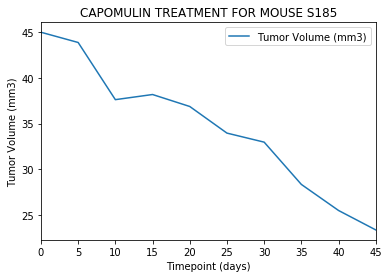

In [180]:
capomulin_mouse = clean_df.loc[((clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 's185'))]
capomulin_mouse_df = capomulin_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
capomulin_mouse_plot = capomulin_mouse_df.plot.line(title = "CAPOMULIN TREATMENT FOR MOUSE S185")
capomulin_mouse_plot.set_xlabel("Timepoint (days)")
capomulin_mouse_plot.set_ylabel("Tumor Volume (mm3)")

#### GENERATE A SCATTER PLOT OF MOUSE WEIGHT VERSUS AVERAGE TUMOR VOLUME FOR THE CAPOMULIN REGIMEN

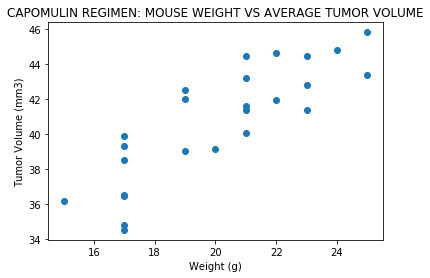

In [181]:
# GET DF FOR NEEDED DATA
weight_volume_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# GET MEAN FOR METRICS OF INTEREST
weight_volume_mean_df = weight_volume_df.groupby("Mouse ID").mean()

# GET LIST OF METRICS TO PLOT
weight_list = weight_volume_mean_df["Weight (g)"]
volume_list = weight_volume_mean_df["Tumor Volume (mm3)"]

# PLOT
plt.scatter(weight_list, volume_list)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("CAPOMULIN REGIMEN: MOUSE WEIGHT VS AVERAGE TUMOR VOLUME")
plt.show()

## Correlation and Regression

#### CALCULATE THE CORRELATION COEFFICIENT AND LINEAR REGRESSION MODEL FOR MOUSE WEIGHT AND AVERAGE TUMOR VOLUME FOR THE CAPOMULIN REGIMEN

Correlation: 0.84
P-value: 0.0
Linear Regression equation: y = 0.95x + 21.55


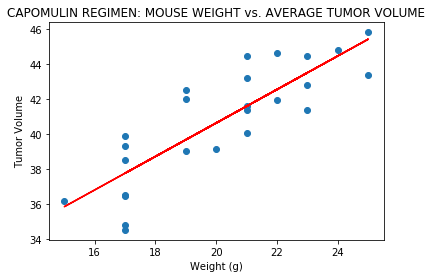

In [182]:
# CORRELATION
correlation = st.pearsonr(weight_list, volume_list) #these lists are above
print(f"Correlation: {round(correlation[0],2)}")
print(f"P-value: {round(correlation[1],2)}")


# GET SLOPES
x_values = weight_list
y_values = volume_list

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Linear Regression equation: {line_equation}")

# PLOT
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("CAPOMULIN REGIMEN: MOUSE WEIGHT vs. AVERAGE TUMOR VOLUME")
plt.show()